In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from src import train

D:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [34]:
df = pd.read_csv('inputs/dataset.csv')

#print(df.shape)
#print(df.Target.value_counts())

#gather all enrolled
enrolled = df.loc[df['Target'] == 'Enrolled']
imputed_df = df.loc[df['Target'] != 'Enrolled']

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# for train and test drop all enrolled
train_df = train_df.loc[train_df['Target'] != 'Enrolled']
#print(train_df[:10])
test_df_en = test_df.copy()
test_df = test_df.loc[test_df['Target'] != 'Enrolled']

# Train rf on train
rf = RandomForestClassifier(n_estimators = 100,random_state=42)
rf.fit(train_df.drop(columns=['Target']),train_df['Target'])

# test rf on valid
print(rf.score(test_df.drop(columns=['Target']),test_df['Target']))
predse = rf.predict(test_df_en.drop(columns=['Target']))
#print(predse[:20])
print(accuracy_score(test_df_en['Target'],predse))

#predict on enrolled
ypreds = rf.predict(enrolled.drop(columns=['Target']))
enrolled['Target'] = ypreds

#print(enrolled[:10])

#concat

train = pd.concat([imputed_df, enrolled], axis=0)
#print(imputed_df.shape)
#print(imputed_df.Target.value_counts())

0.8950953678474114
0.7423728813559322


C:\Users\saffa\AppData\Local\Temp\ipykernel_11668\2098003373.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrolled['Target'] = ypreds


In [3]:
train.run(df)

#######################################
     Model IS: SVC()
#######################################
Accuracy Scores ARE: 0.8815068493150685 for test set AND 0.8937246963562753 for train
ROC SCORES ARE: 0.8623086134633479 for test set
#######################################
     Model IS: RandomForestClassifier()
#######################################
Accuracy Scores ARE: 0.9219178082191781 for test set AND 1.0 for train
ROC SCORES ARE: 0.9103856113093989 for test set
THE END


In [9]:
!pip install lofo-importance

     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [4]:
#Nationality/international; first sem 2nd sem credited; 

In [28]:
X = df.to_numpy()
np.isposinf(X).any() 

False

In [35]:
#train = pd.read_csv('inputs/dataset.csv')
train.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [36]:
from lofo import Dataset, LOFOImportance, plot_importance
from sklearn.model_selection import KFold
import xgboost as xgb
target_dict = {
    'Dropout':0,
    'Graduate':1,
    }
#train = pd.read_csv('inputs/dataset.csv')
model = RandomForestClassifier()
train['Target'] = train['Target'].map(target_dict)
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

features = [col for col in train.columns if col != "Target"]

dataset = Dataset(df=train, target="Target", features=features, auto_group_threshold=0.8)
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc", model=model)
imp_df = lofo_imp.get_importance()

Automatically grouped features by correlation:
1 ['International', 'Nacionality']
2 ['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']
3 ['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']
4 ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']


  0%|          | 0/30 [00:00<?, ?it/s]

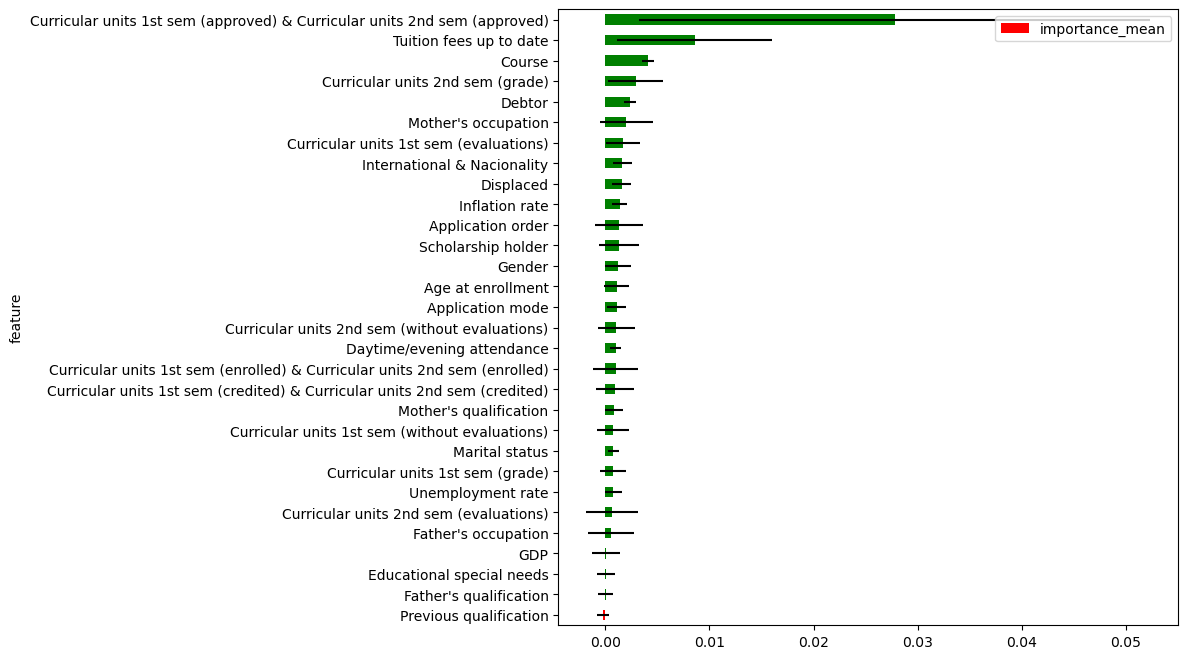

In [37]:
plot_importance(imp_df)

In [38]:
df = pd.read_csv('inputs/dataset.csv')
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [58]:
df = pd.read_csv('inputs/dataset.csv')

#print(df.shape)
#print(df.Target.value_counts())

#gather all enrolled
enrolled = df.loc[df['Target'] == 'Enrolled']
imputed_df = df.loc[df['Target'] != 'Enrolled']

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# for train and test drop all enrolled
train_df = train_df.loc[train_df['Target'] != 'Enrolled']
#print(train_df[:10])
test_df_en = test_df.copy()
test_df = test_df.loc[test_df['Target'] != 'Enrolled']

# Train rf on train
rf = RandomForestClassifier(n_estimators = 100,random_state=42)
rf.fit(train_df.drop(columns=['Target']),train_df['Target'])

# test rf on valid
print(rf.score(test_df.drop(columns=['Target']),test_df['Target']))
predse = rf.predict(test_df_en.drop(columns=['Target']))
#print(predse[:20])
print(accuracy_score(test_df_en['Target'],predse))

#predict on enrolled
ypreds = rf.predict(enrolled.drop(columns=['Target']))
enrolled['Target'] = ypreds

#print(enrolled[:10])

#concat

df = pd.concat([imputed_df, enrolled], axis=0)
#print(imputed_df.shape)
#print(imputed_df.Target.value_counts())

df = df.drop(columns=[#'Previous qualification',
                      #'Curricular units 1st sem (enrolled)',
                      #'Curricular units 2nd sem (credited)',
                      #'Nacionality',
                      #"Father's qualification",
                      #'GDP',
                      #'Educational special needs',
                      #'Curricular units 2nd sem (enrolled)'
                ])

0.8950953678474114
0.7423728813559322


C:\Users\saffa\AppData\Local\Temp\ipykernel_11668\1494109054.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrolled['Target'] = ypreds


In [59]:
from src import train

train.run(df)

#######################################
     Model IS: SVC()
#######################################
Accuracy Scores ARE: 0.8828767123287671 for test set AND 0.8910256410256411 for train
ROC SCORES ARE: 0.8645208824192658 for test set
#######################################
     Model IS: RandomForestClassifier()
#######################################
Accuracy Scores ARE: 0.9157534246575343 for test set AND 1.0 for train
ROC SCORES ARE: 0.9041317719146817 for test set
THE END


#######################################
     Model IS: SVC()
#######################################
Accuracy Scores ARE: 0.8815068493150685 for test set AND 0.8937246963562753 for train
ROC SCORES ARE: 0.8623086134633479 for test set
#######################################
     Model IS: RandomForestClassifier()
#######################################
Accuracy Scores ARE: 0.9219178082191781 for test set AND 1.0 for train
ROC SCORES ARE: 0.9103856113093989 for test set
THE END